# Two Sample Tests

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats 
import scipy.stats as stats

In [2]:
df = pd.read_csv('E:\\Python\\STATISTICS\\Two Machines.csv')
df

,Volume,Machine
0,154.27,Machine 1
1,150.03,Machine 1
2,151.14,Machine 1
3,145.47,Machine 1
4,149.71,Machine 1
...,...,...
195,152.05,Machine 2
196,151.41,Machine 2
197,153.76,Machine 2
198,150.75,Machine 2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Volume   200 non-null    float64
 1   Machine  200 non-null    object 
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [4]:
df.describe()

,Volume
count,200.000000
mean,151.538350
std,2.180823
min,145.440000
25%,150.015000
50%,151.515000
75%,153.110000
max,156.230000


In [5]:
df['Machine'].describe()

count           200
unique            2
top       Machine 1
freq            100
Name: Machine, dtype: object

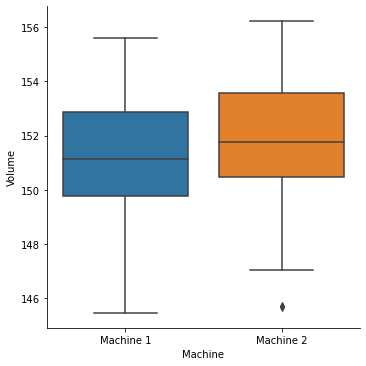

In [6]:
sns.catplot(data=df, x='Machine', y='Volume', kind='box')

# Two Sample Z Test

SciPy.stats does not have a z test (one or two sample). 

In [7]:
df[df["Machine"]=="Machine 1"]["Volume"]

0     154.27
1     150.03
2     151.14
3     145.47
4     149.71
       ...  
95    152.85
96    151.03
97    152.08
98    152.29
99    148.18
Name: Volume, Length: 100, dtype: float64

In [8]:
m1 = df[df['Machine'] == 'Machine 1']['Volume']
m2 = df[df['Machine'] == 'Machine 2']['Volume']

In [9]:
m2

100    152.87
101    154.68
102    154.21
103    155.91
104    152.63
        ...  
195    152.05
196    151.41
197    153.76
198    150.75
199    147.80
Name: Volume, Length: 100, dtype: float64

In [10]:
weightstats.ztest(m1, m2)

(-2.189406040190184, 0.028567341032618248)

In [11]:
stats.ttest_ind(m1, m2, equal_var=True)

Ttest_indResult(statistic=-2.189406040190184, pvalue=0.029736299645472124)

### Two Sample Z Test - Male vs Female Tips

In [12]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [13]:
tips = sns.load_dataset("tips")

In [14]:
tips.shape

(244, 7)

In [15]:
tips.to_csv(r"E:\Python\STATISTICS\tips.csv")

In [16]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


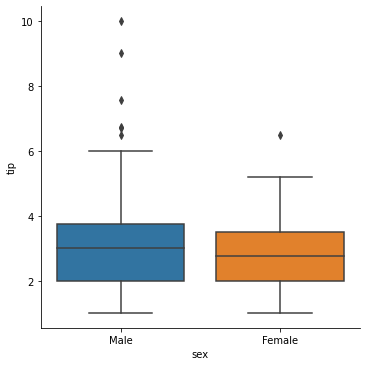

In [18]:
sns.catplot(data=tips, x='sex', y='tip', kind='box')

In [19]:
tm = tips[tips['sex']=='Male']['tip']
tm.mean(), tm.var()

(3.0896178343949052, 2.2174242119875878)

In [20]:
3.08   2.83

SyntaxError: invalid syntax (<ipython-input-20-1d689c0efcb4>, line 1)

In [21]:
tf = tips[tips['sex']=='Female']['tip']
tf.mean(), tf.var()

(2.833448275862069, 1.3444275060144353)

In [22]:
weightstats.ztest(tm, tf)

(1.3878597054212687, 0.1651797698624794)

In [23]:
#Alternatively you can perform 2 sample t test using stats library
stats.ttest_ind(tm, tf, equal_var=True)

Ttest_indResult(statistic=1.3878597054212687, pvalue=0.16645623503456763)

### Two Sample Z Test - Lunch vs Dinner Tips

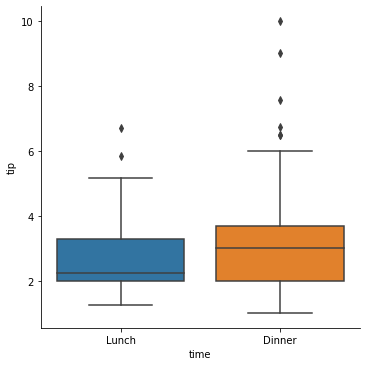

In [24]:
sns.catplot(data=tips, x='time', y='tip', kind='box')

In [25]:
#Tip during lunch
tl = tips[tips['time']=='Lunch']['tip']
tl

77     4.00
78     3.00
79     2.71
80     3.00
81     3.40
       ... 
222    1.92
223    3.00
224    1.58
225    2.50
226    2.00
Name: tip, Length: 68, dtype: float64

In [26]:
#tip during dinner
td = tips[tips['time']=='Dinner']['tip']
td

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 176, dtype: float64

In [27]:
weightstats.ztest(tl, td)

(-1.9062569301202392, 0.05661687925222567)

In [28]:
stats.ttest_ind(tl, td, equal_var=True)[1]

0.05780153475171558

In [29]:
if stats.ttest_ind(tl, td, equal_var=True)[1] < 0.05:
    print("reject null")
else:
    print("accept null")

accept null


# Two Sample t Test (Equal Variances)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats 
import scipy.stats as stats

In [38]:
m1 = [150, 152, 154, 152, 151]
m2 = [156, 155, 158, 155, 154]

In [39]:
sum(m1)/5,  sum(m2)/5 

(151.8, 155.6)

In [40]:
stats.variation(m1),  stats.variation(m2),   # stats.variation(m3),

(0.008739459263123583, 0.008717647793220139)

In [41]:
stats.ttest_ind(m1, m2)

Ttest_indResult(statistic=-4.005551702879929, pvalue=0.003919295477128331)

# Two Sample t Test (Unequal Variance)


This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values. This test assumes that the
populations have identical variances by default.

In [19]:

m1 = [150, 152, 154, 152, 151]
m3 = [144, 162, 177, 150, 140]


In [25]:
sum(m1)/5, sum(m3)/5,

(151.8, 154.6)

In [20]:
stats.ttest_ind(m1, m3, equal_var=False)

Ttest_indResult(statistic=-0.4146442144313621, pvalue=0.699289145758865)

# Paired t Test

When two samples are paired. That means effect of one sample is dependant on working of other

H0 = mean(before) = mean(after)

Ha= mean(before) != mean(after)

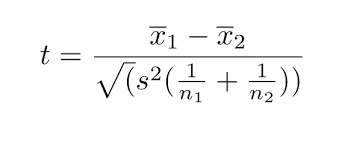

the null hypothesis that 2 related or
repeated samples have identical average (expected) values.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats 
import scipy.stats as stats

In [52]:
bp_before = [120, 122, 143, 100, 109]
bp_after = [122, 120, 141, 109, 109]

In [53]:
sum(bp_before)/5   ,  sum(bp_after)/5

(118.8, 120.2)

In [54]:
###
stats.ttest_rel(bp_before, bp_after)

Ttest_relResult(statistic=-0.6864064729836442, pvalue=0.5301776477578163)

In [55]:
bp_before = [140, 142, 143, 100, 109]
bp_after = [122, 120, 125, 90, 109]

In [56]:
sum(bp_before)/5   ,  sum(bp_after)/5

(126.8, 113.2)

In [57]:
###
stats.ttest_rel(bp_before, bp_after)
# related t test

Ttest_relResult(statistic=3.4701104689428357, pvalue=0.02558104515003593)

In [15]:
sum(bp_before)/5   ,  sum(bp_after)/5

(126.8, 116.4)

# Two Proportions Test


## condition for perportion test

Ramdom samples

Each observation should be independant of others

    sampling with replacement
    
    if sampling without replacement, the sample size should not be more than 10% of the population.
    
The data contains only two categories such as success or failure.


For Normal approximation np>=10  and  n(1-p) >= 10

##################################################################
    

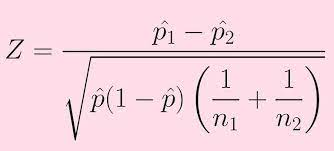

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# import statsmodels.stats.proportion as proportion
from statsmodels.stats import proportion

In [59]:
proportion.test_proportions_2indep(100, 200, 50, 100)
# Manual calculation using pooled method returned the Z value as 1.20, while we are getting 1.14 here)
# Various methos are there. method='score' gives approximately the same result as manual calculation.

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 0.0
pvalue = 1.0
compare = diff
method = agresti-caffo
diff = 0.0
ratio = 1.0
odds_ratio = 1.0
variance = 0.0036886041545331006
alternative = two-sided
value = 0
tuple = (0.0, 1.0)

In [40]:
proportion.test_proportions_2indep(100, 200, 50, 100, method='score')

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 0.0
pvalue = 1.0
compare = diff
method = score
variance = 0.0037625418060200666
alternative = two-sided
prop1_null = 0.5
prop2_null = 0.5
tuple = (0.0, 1.0)
diff = 0.0
ratio = 1.0
odds_ratio = 1.0
value = 0

# Two Variances Test

Draw a Chisquare distribution for df=50 Purpose: check sample std Conditions :

Random samples

each obs should be independent of other

sampling with replacement

if sampling withoout replacement, the sample size should not be more than 10% of the population
the data follows normal distribution

In z-test and t test we compare mean and std

here in variance test, we are comparing variance:

### Chi-square test

For testing population and variance against a specified value

testing goodness of fit of some probability distribution

testing independance of two attribute

    chi_sq_cal = (n-1) s^2/ sigma^2
### F-test:
for testing equality of two variance from the different population

for testing equality of several means with Anova.



#### Example 1


In the production company , we selected 8 samples from machine A and the standard deviation was 1.1
From Machine B we took 5 samples and variance is 11.  is there difference in variance  at 90% of confidence level.

#### H0 : standard deviation of sample1 == standard deviation of sample2
#### H1 : standard deviation of both samples are not equale

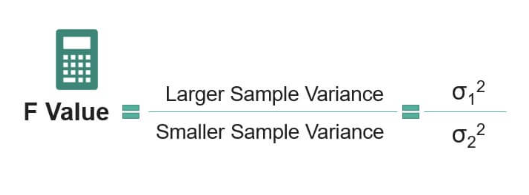

n1= 5 , variance = 11  , df1 = 4

n2 = 8.  std1= 1.1, variance = 1.21 , df2 = 7 

fcalc = 11/1.21 = 9.09

In [ ]:
# Bad news ... There is no direct test and hence we will need to do step by step

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f

In [ ]:
F_cal = 11/1.21
F_cal

9.090909090909092

In [45]:
F_cri_right = f.isf(0.05, 4, 7)
F_cri_right

4.120311726897633

In [46]:
F_cri_left = f.isf(0.95, 4, 7)
F_cri_left

0.1640901524729093

#### Bartlett Test

In [ ]:
m1 = [150, 150, 151, 148, 151, 152, 149, 150]
np.std(m1)

1.165922381636102

In [ ]:
m2 = [135, 152, 154, 169, 157]
np.std(m2)

10.9288608738514

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html
stats.bartlett(m1,m2)

BartlettResult(statistic=19.105727631632714, pvalue=1.2367317910523616e-05)

#### Levene Test

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
# Levene’s test is an alternative to Bartlett’s test bartlett 
# in the case where there are significant deviations from normality.
stats.levene(m1, m2)

LeveneResult(statistic=5.416245804750017, pvalue=0.040060452607943706)

# ANOVA

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats import oneway as oneway

In [48]:
m1 = [150, 151, 152, 152, 151, 150]
m2 = [153, 152, 148, 151, 149, 152]
m3 = [156, 154, 155, 156, 157, 155]

In [49]:
stats.f_oneway(m1, m2, m3)

F_onewayResult(statistic=22.264705882352935, pvalue=3.2374085509077445e-05)

F Calculated in manual calculation was 22.24
Numerator df = 2
Denominator df = 15
We can find p-value, as the area to the right of 22.24

In [ ]:
stats.f.sf(22.2645, 2, 15)

3.237576504411197e-05

In [51]:
oneway.anova_oneway((m1, m2, m3), use_var = 'equal')

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 22.264705882352892
pvalue = 3.237408550907782e-05
df = (2.0, 15.0)
df_num = 2.0
df_denom = 15.0
nobs_t = 18.0
n_groups = 3
means = [151.         150.83333333 155.5       ]
nobs = [6. 6. 6.]
vars_ = [0.8        3.76666667 1.1       ]
use_var = equal
welch_correction = True
tuple = (22.264705882352892, 3.237408550907782e-05)

### Comparing cars mpg from three countries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.oneway as oneway

In [53]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [5]:
mpg = sns.load_dataset("mpg")

In [6]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
mpg.to_csv(r"E:\Python\STATISTICS\mpg.csv")

In [56]:
mpg.groupby('origin').mean()['mpg']

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

In [ ]:
mpg.groupby(by=['origin', 'cylinders']).mean()

mpg  displacement  horsepower       weight  \
origin cylinders                                                     
europe 4          28.411111    104.222222   78.311475  2330.015873   
       5          27.366667    145.000000   82.333333  3103.333333   
       6          20.100000    159.750000  113.500000  3382.500000   
japan  3          20.550000     72.500000   99.250000  2398.500000   
       4          31.595652     99.768116   75.579710  2153.492754   
       6          23.883333    156.666667  115.833333  2882.000000   
usa    4          27.840278    124.284722   80.956522  2437.166667   
       6          19.663514    226.283784   99.671233  3213.905405   
       8          14.963107    345.009709  158.300971  4114.718447   

                  acceleration  model_year  
origin cylinders                            
europe 4             16.722222   75.507937  
       5             18.633333   79.000000  
       6             16.425000   78.250000  
japan  3             13.250000   75.500000  
       4             16.569565   77.507246  
       6             13.550000   78.000000  
usa    4             16.526389   78.027778  
       6             16.474324   75.635135  
       8             12.955340   73.902913

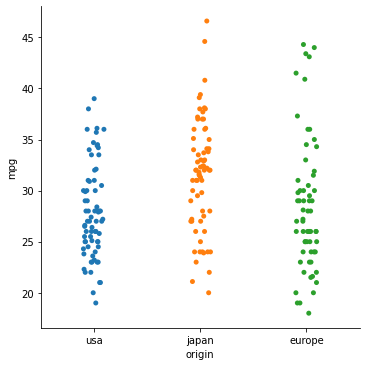

In [8]:
sns.catplot(data=mpg, x='origin', y=mpg[mpg['cylinders'] == 4]['mpg'])

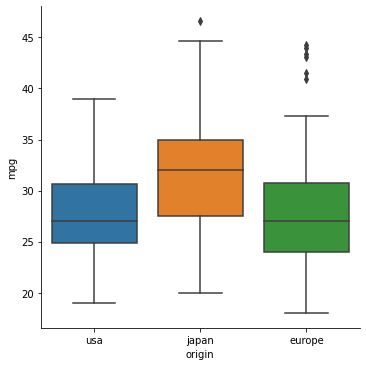

In [ ]:
sns.catplot(data=mpg, x='origin', y=mpg[mpg['cylinders'] == 4]['mpg'], kind='box')

In [58]:
eu = mpg[(mpg['cylinders'] == 4) & (mpg['origin'] == 'europe')]['mpg']
jp = mpg[(mpg['cylinders'] == 4) & (mpg['origin'] == 'japan')]['mpg']
us = mpg[(mpg['cylinders'] == 4) & (mpg['origin'] == 'usa')]['mpg']

In [59]:
stats.f_oneway(eu, jp, us)

F_onewayResult(statistic=9.411845545485601, pvalue=0.00012379894210177303)

# Goodness of Fit Test

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [61]:
# Flipping a coin
exp = [50, 50]
obs = [40, 60]

In [62]:
stats.chisquare(obs, exp)

Power_divergenceResult(statistic=4.0, pvalue=0.04550026389635857)

In [63]:
# By default expected is equally likely
stats.chisquare(obs)

Power_divergenceResult(statistic=4.0, pvalue=0.04550026389635857)

### Die Roll

In [64]:
obs = [10, 6, 8, 22, 11, 8]

In [65]:
stats.chisquare(obs)

Power_divergenceResult(statistic=15.215384615384615, pvalue=0.009480606629220312)

### Shirt Sale

In [66]:
#Shirt Sale
exp_r = pd.Series([0.1, 0.2, 0.4, 0.3])
obs = pd.Series([25, 41, 91, 68])
exp = exp_r * sum(obs)
exp

0    22.5
1    45.0
2    90.0
3    67.5
dtype: float64

In [67]:
stats.chisquare(obs, exp)

Power_divergenceResult(statistic=0.648148148148148, pvalue=0.8853267818237286)

# Contingency Tables

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [68]:
sh_op = np.array([[22, 26, 23], [28, 62, 26], [72, 22, 66]])

In [69]:
sh_op

array([[22, 26, 23],
       [28, 62, 26],
       [72, 22, 66]])

In [71]:
stats.chi2_contingency(sh_op)

(50.09315721064659,
 3.4527076339398545e-10,
 4,
 array([[24.96253602, 22.50720461, 23.53025937],
        [40.78386167, 36.77233429, 38.44380403],
        [56.25360231, 50.7204611 , 53.0259366 ]]))

In [72]:
sh_op_df = pd.DataFrame(sh_op, columns=['Shift1', 'Shift2', 'Shift3'], index=['Worker1', 'Worker2', 'Worker3'])
sh_op_df

,Shift1,Shift2,Shift3
Worker1,22,26,23
Worker2,28,62,26
Worker3,72,22,66


In [73]:
stats.chi2_contingency(sh_op_df)

(50.09315721064659,
 3.4527076339398545e-10,
 4,
 array([[24.96253602, 22.50720461, 23.53025937],
        [40.78386167, 36.77233429, 38.44380403],
        [56.25360231, 50.7204611 , 53.0259366 ]]))

### Day vs Smokers

In [74]:
tips = sns.load_dataset('tips')

In [75]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.groupby(by = ['day', 'smoker']).count()

total_bill  tip  sex  time  size
day  smoker                                  
Thur Yes             17   17   17    17    17
     No              45   45   45    45    45
Fri  Yes             15   15   15    15    15
     No               4    4    4     4     4
Sat  Yes             42   42   42    42    42
     No              45   45   45    45    45
Sun  Yes             19   19   19    19    19
     No              57   57   57    57    57

In [76]:
day_smoker = tips.pivot_table(index='day', columns='smoker', aggfunc='count')['tip']
day_smoker

smoker,Yes,No
day,,
Thur,17,45
Fri,15,4
Sat,42,45
Sun,19,57


In [78]:
stats.chi2_contingency(day_smoker)

(25.787216672396262,
 1.0567572499836523e-05,
 3,
 array([[23.63114754, 38.36885246],
        [ 7.24180328, 11.75819672],
        [33.15983607, 53.84016393],
        [28.96721311, 47.03278689]]))

### End of Section 8